# Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

img=cv2.imread('shoulder.jpg',cv2.IMREAD_GRAYSCALE)
img.dtype

dtype('uint8')

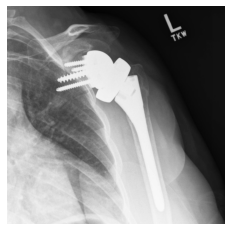

In [3]:
img=np.float32(img)

plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(img,cmap="gray")
plt.show()

# Part 2

In [4]:
def fourier_transform(img):
    f=np.fft.fft2(img)
    fshift=np.fft.fftshift(f)
    return fshift

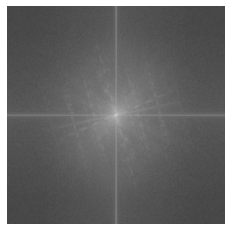

In [7]:
fourier_img = fourier_transform(np.float32(img))

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(np.log(np.abs(fourier_img)), cmap="gray")
plt.show()


# Part 3

In [22]:
P,Q = img.shape
print(P,Q)

def distance(u,v):
    return math.sqrt((u-P/2)**2 + (v-Q/2)**2)

1024 1024


## Ideal Low pass filter

In [9]:
def ideal_low_pass_filter(P,Q,d0):
    hfilter=np.zeros((P,Q),dtype=np.float32)
    for i in range(hfilter.shape[0]):
        for j in range(hfilter.shape[1]):
            if distance(i,j)<=d0:
                hfilter[i][j]=1
    return hfilter            

## Gaussian filter

In [11]:
def gaussian_filter(P,Q,d0):
    hfilter=np.zeros((P,Q),dtype=np.float32)
    for i in range(hfilter.shape[0]):
        for j in range(hfilter.shape[1]):
            soorat=-1*distance(i,j)**2
            makhraj=2*(d0**2)
            hfilter[i][j]=np.exp(soorat/makhraj)
    return hfilter   


## Butterworth

In [12]:
def butterworth_filter(P,Q,d0):
    hfilter=np.zeros((P,Q),dtype=np.float32)
    for i in range(hfilter.shape[0]):
        for j in range(hfilter.shape[1]):
            hfilter[i][j]=1/(1+(distance(i,j)/d0)**4)
    return hfilter   

# Part 4

In [14]:
def inverse_fourier(f):
    f_ishift = np.fft.ifftshift(f)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

## Ideal high pass

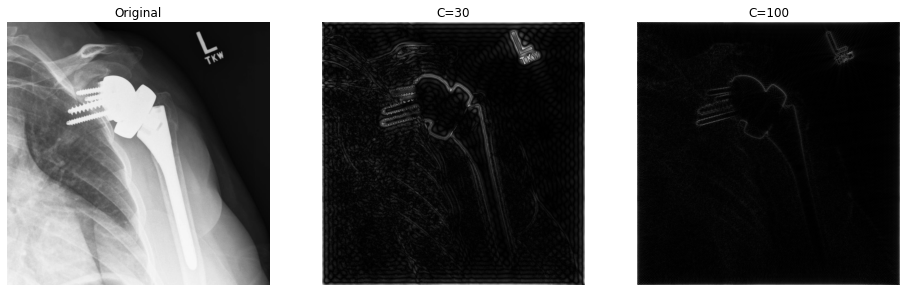

In [18]:
ideal_30 = inverse_fourier(fourier_img*(1-ideal_low_pass_filter(P, Q, 30)))
ideal_100 = inverse_fourier(fourier_img*(1-ideal_low_pass_filter(P, Q, 100)))

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("C=30")
plt.imshow(ideal_30, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("C=100")
plt.imshow(ideal_100, cmap="gray")
plt.axis('off')
plt.show()

## Gaussian high pass

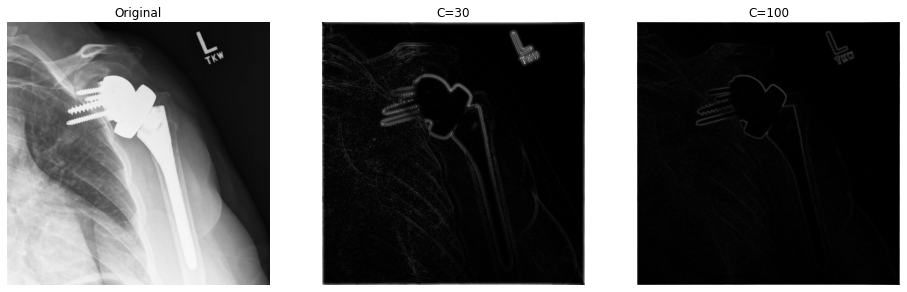

In [19]:
gaussian_30 = inverse_fourier(fourier_img*(1-gaussian_filter(P, Q, 30)))
gaussian_100 = inverse_fourier(fourier_img*(1-gaussian_filter(P, Q, 100)))

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("C=30")
plt.imshow(gaussian_30, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("C=100")
plt.imshow(gaussian_100, cmap="gray")
plt.axis('off')
plt.show()

## Butterworth high pass

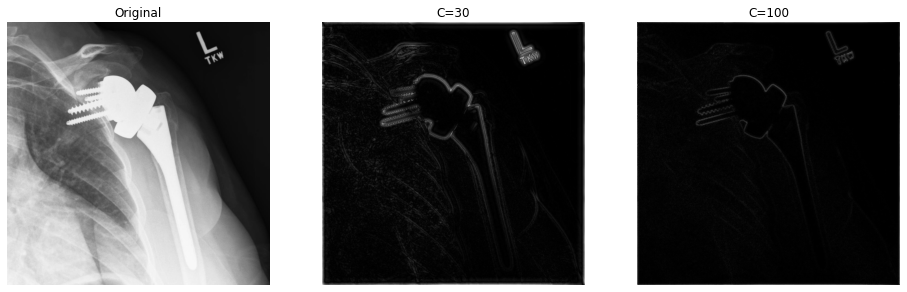

In [20]:
butterworth_30=inverse_fourier(fourier_img*(1-butterworth_filter(P,Q,30)))
butterworth_100=inverse_fourier(fourier_img*(1-butterworth_filter(P,Q,100)))

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("C=30")
plt.imshow(butterworth_30, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("C=100")
plt.imshow(butterworth_100, cmap="gray")
plt.axis('off')
plt.show()